In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation , Dense , Flatten , BatchNormalization,Dropout , Conv2D , MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline

In [2]:
train_path = "C:/Users/Aasisjuli/Desktop/data for training/chest_xray/train"
valid_path ="C:/Users/Aasisjuli/Desktop/data for training/chest_xray/val"
test_path="C:/Users/Aasisjuli/Desktop/data for training/chest_xray/test"

In [3]:
train_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory = train_path ,
                                     target_size=(224,224),
                                    classes=['NORMAL','PNEUMONIA'],
                                    batch_size=10)
valid_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory = valid_path ,
                                     target_size=(224,224),
                                    classes=['NORMAL','PNEUMONIA'],
                                    batch_size=10)
test_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory = test_path ,
                                     target_size=(224,224),
                                    classes=['NORMAL','PNEUMONIA'],
                                    batch_size=10)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
imgs,labels=next(train_batches)

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(imgs)
print(labels)

In [6]:
from tensorflow.keras.applications import DenseNet169

In [7]:
from tensorflow.keras.applications.densenet import preprocess_input

In [8]:
densenet = DenseNet169(input_shape=[224,244,3],weights='imagenet',include_top=False)

51879936/51877672 [==============================] - 26s 0us/step


In [9]:
densenet.summary()


Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 244, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 250, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 122, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 122, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

Total params: 12,642,880
Trainable params: 12,484,480
Non-trainable params: 158,400
__________________________________________________________________________________________________


In [10]:
for layer in densenet.layers:
    layer.trainable=False

In [11]:
x=Flatten()(densenet.output)
prediction = Dense(2,activation='softmax')(x)

In [12]:

model = keras.Model(inputs=densenet.input, outputs=prediction)

In [13]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 244, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 250, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 122, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 122, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

conv5_block30_1_relu (Activatio (None, 7, 7, 128)    0           conv5_block30_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block30_2_conv (Conv2D)   (None, 7, 7, 32)     36864       conv5_block30_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block30_concat (Concatena (None, 7, 7, 1600)   0           conv5_block29_concat[0][0]       
                                                                 conv5_block30_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block31_0_bn (BatchNormal (None, 7, 7, 1600)   6400        conv5_block30_concat[0][0]       
__________________________________________________________________________________________________
conv5_block31_0_relu (Activatio (None, 7, 7, 1600)   0           conv5_block31_0_bn[0][0]         
__________

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(x=train_batches , validation_data=valid_batches , validation_steps=len(valid_batches), epochs=5 , verbose=2)

Epoch 1/5
522/522 - 618s - loss: 0.6024 - accuracy: 0.9124 - val_loss: 1.3043 - val_accuracy: 0.8750
Epoch 2/5
522/522 - 612s - loss: 0.6588 - accuracy: 0.9394 - val_loss: 0.6169 - val_accuracy: 0.9375
Epoch 3/5
522/522 - 618s - loss: 0.2474 - accuracy: 0.9707 - val_loss: 1.2526 - val_accuracy: 0.8125
Epoch 4/5
522/522 - 616s - loss: 0.2332 - accuracy: 0.9728 - val_loss: 5.9642 - val_accuracy: 0.5625
Epoch 5/5
522/522 - 611s - loss: 0.2458 - accuracy: 0.9718 - val_loss: 1.3308 - val_accuracy: 0.8750


In [16]:
predictions = model.predict(x=test_batches,verbose=0,steps=len(test_batches))

In [17]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
cm = confusion_matrix(y_true= test_batches.classes , y_pred=np.argmax(predictions,axis=-1))

Confusion matrix, without normalization
[[ 24 210]
 [ 54 336]]


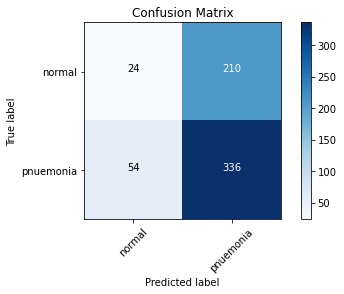

In [21]:
cm_plot_labels=['normal','pnuemonia']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels,title='Confusion Matrix')


In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')